<a href="https://colab.research.google.com/github/Jossyjboy04/Caddetection/blob/master/cgpaPredictionV1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Environmental setup
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading data
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Ai_projects/cgpapredict.xlsx')
print(df.shape)

(2490, 5)


In [ ]:
print(df.columns)

Index(['Course of study', 'first year cgpa', 'second year cgpa',
       'third year cgpa', 'CGPA'],
      dtype='object')


In [ ]:
#label selection
X=df.drop(columns=["CGPA"])
y=df["CGPA"]
print(X)

                            Course of study  first year cgpa  \
0     Industrial Chemical Engineeringmistry         2.875000   
1             BioChemical Engineeringmistry         3.250000   
2             BioChemical Engineeringmistry         1.777778   
3             BioChemical Engineeringmistry         3.608696   
4             BioChemical Engineeringmistry         2.659574   
...                                     ...              ...   
2485                  Petroleum Engineering         3.511111   
2486                  Petroleum Engineering         3.755556   
2487                  Petroleum Engineering         3.622222   
2488                  Petroleum Engineering         3.822222   
2489                  Petroleum Engineering         4.177778   

      second year cgpa  third year cgpa  
0             3.475000         2.615385  
1             4.261905         3.368421  
2             1.979167         1.489583  
3             3.687500         3.625000  
4             2.97916

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Step 1: Identify columns
categorical_features = ['Course of study']
numerical_features = ['first year cgpa', 'second year cgpa', 'third year cgpa']

# Step 2: Define transformers
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Step 3: Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
X_processed = preprocessor.fit_transform(X)
print(X_processed)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9960 stored elements and shape (2490, 15)>
  Coords	Values
  (0, 0)	-1.332914460502027
  (0, 1)	0.16883881551174915
  (0, 2)	-0.9393056451415055
  (0, 10)	1.0
  (1, 0)	-0.7543730275077085
  (1, 1)	1.1894667936046037
  (1, 2)	-0.07651857575456965
  (1, 3)	1.0
  (2, 0)	-3.025683838179602
  (2, 1)	-1.7712807821171253
  (2, 2)	-2.229185841893466
  (2, 3)	1.0
  (3, 0)	-0.20098557012927762
  (3, 1)	0.4444546915594422
  (3, 2)	0.2174552435422276
  (3, 3)	1.0
  (4, 0)	-1.665268049800276
  (4, 1)	-0.4742648948338633
  (4, 2)	-0.17639429697862455
  (4, 3)	1.0
  (5, 0)	-0.08966584891120995
  (5, 1)	-0.4472437309478005
  (5, 2)	0.00262822143994461
  (5, 3)	1.0
  (6, 0)	-2.223293829667515
  :	:
  (2483, 14)	1.0
  (2484, 0)	0.2655740912293742
  (2484, 1)	-0.26834498850039246
  (2484, 2)	0.17839578508233456
  (2484, 14)	1.0
  (2485, 0)	-0.3515367706312323
  (2485, 1)	-0.7714977027686161
  (2485, 2)	-0.722802157642757
  (2485, 14)	1.0
  (24

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")



Model Evaluation:
MAE:  0.098
RMSE: 0.130
R²:   0.962


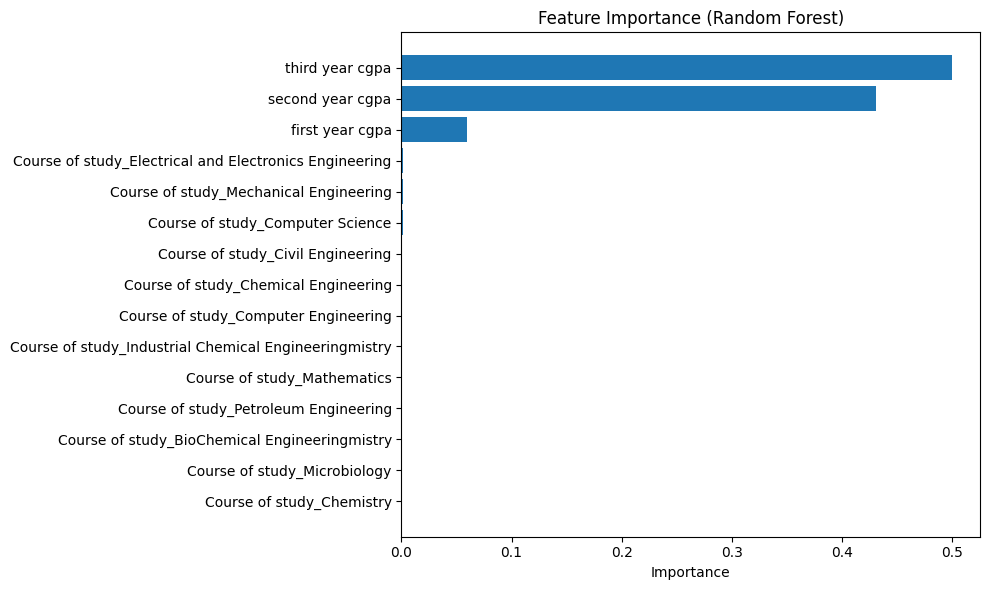

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature names
cat_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
feature_names = numerical_features + list(cat_features)

# Plot
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.6460 - mae: 2.8089 - val_loss: 1.1333 - val_mae: 0.9084
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8885 - mae: 0.7883 - val_loss: 0.4430 - val_mae: 0.5379
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3386 - mae: 0.4685 - val_loss: 0.1574 - val_mae: 0.3075
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1280 - mae: 0.2807 - val_loss: 0.0716 - val_mae: 0.2029
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0650 - mae: 0.1964 - val_loss: 0.0499 - val_mae: 0.1653
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0491 - mae: 0.1666 - val_loss: 0.0429 - val_mae: 0.1510
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0385 - mae: 0.1477 - val_loss: 0.0377 - val_mae: 0.1417
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0329 - mae: 0.1368 - val_loss: 0.0342 - val_mae: 0.1349
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0

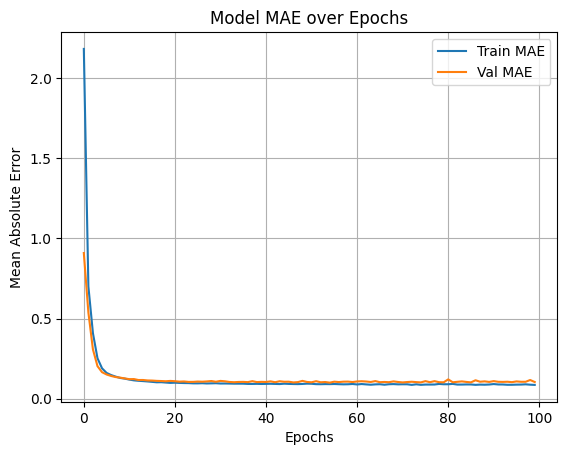

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict
y_pred_nn = model.predict(X_test).flatten()

# Evaluate using metrics
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network MAE: {mae_nn:.4f}")
print(f"Neural Network RMSE: {rmse_nn:.4f}")
print(f"Neural Network R² Score: {r2_nn:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Neural Network MAE: 0.0941
Neural Network RMSE: 0.1263
Neural Network R² Score: 0.9641


Neural Network MAE: 0.0941
Neural Network RMSE: 0.1263
Neural Network R² Score: 0.9641


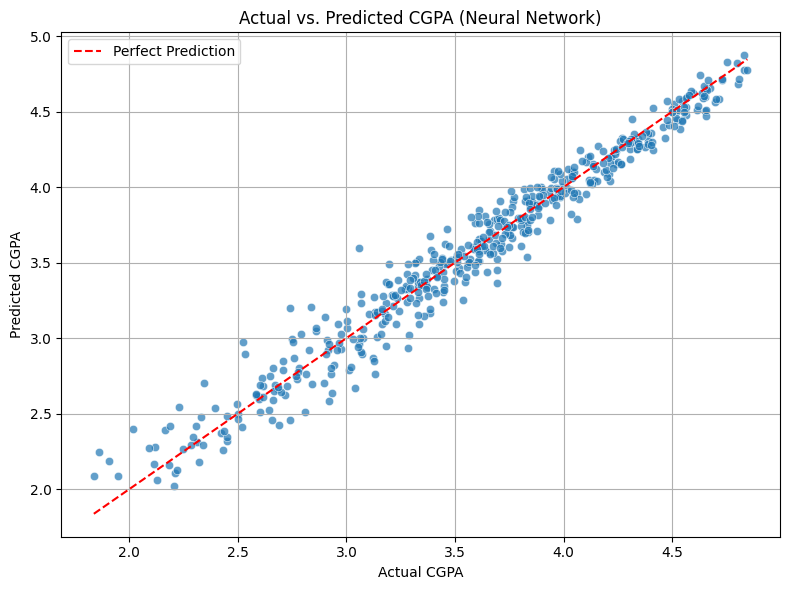

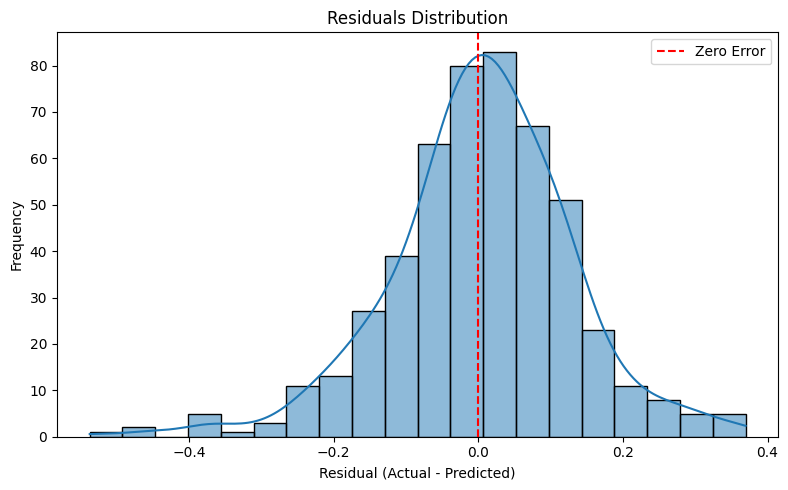

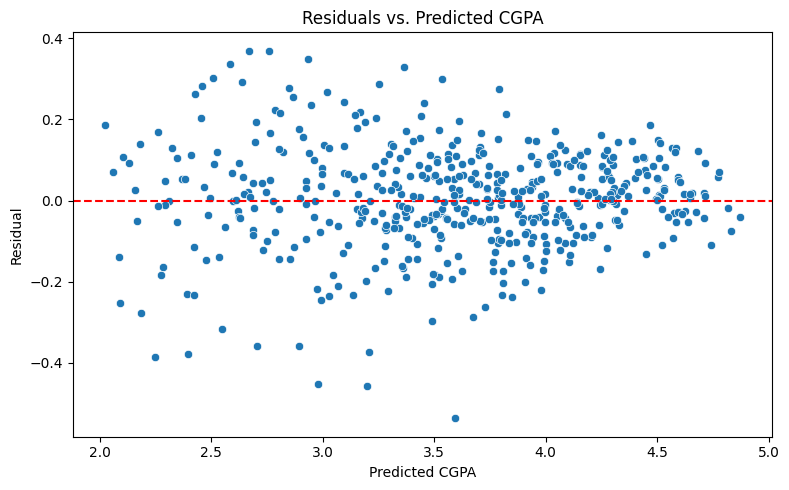

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use raw y_test and y_pred_nn
mae = mean_absolute_error(y_test, y_pred_nn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2 = r2_score(y_test, y_pred_nn)

print(f"Neural Network MAE: {mae:.4f}")
print(f"Neural Network RMSE: {rmse:.4f}")
print(f"Neural Network R² Score: {r2:.4f}")

# --- Plot 1: Actual vs. Predicted ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_nn, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs. Predicted CGPA (Neural Network)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Residuals Distribution ---
residuals = y_test - y_pred_nn
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 3: Residuals vs. Predicted ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_nn, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted CGPA')
plt.ylabel('Residual')
plt.title('Residuals vs. Predicted CGPA')
plt.tight_layout()
plt.show()


In [ ]:
import joblib
import os

# Create model save directory
model_save_dir = '/content/drive/MyDrive/Ai_projects/saved_models'
os.makedirs(model_save_dir, exist_ok=True)

# Save Keras model
model.save(os.path.join(model_save_dir, 'neural_network_cgpa_model.h5'))

# Save preprocessor
joblib.dump(preprocessor, os.path.join(model_save_dir, 'preprocessor.joblib'))

print("Neural network model and preprocessor saved successfully.")


Neural network model and preprocessor saved successfully.


In [9]:
import joblib
print(joblib.__version__)


1.5.1
